# PRODIGY_DS_TASK_04: Social Media Data Analysis
**Dataset Overview**

- This dataset appears to focus on social media posts  from Twitter with associated sentiment information. The main goal is to analyze these posts to understand public opinion and attitudes regarding different entities, such as brands, products, or topics.
- Sample Data set from, [https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis]

## Important Libraries

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Load Data


In [2]:
# Step 2: Load Dataset

# Define possible column names
column_names = ["iD", "entity", "sentiment", "text"]

data = pd.read_csv("twitter_training.csv",names=column_names)
print(data.head())
print(data.tail())


     iD       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
         iD  entity sentiment  \
74677  9200  Nvidia  Positive   
74678  9200  Nvidia  Positive   
74679  9200  Nvidia  Positive   
74680  9200  Nvidia  Positive   
74681  9200  Nvidia  Positive   

                                                    text  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between t

### Data set Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   iD         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


- As we can see from the output all attributes has no null values
to make sure we can also do.
Attributes

1. ID:
   - Description: A unique identifier for the user who posted that statement/s.
   - Purpose: It helps in distinguishing between individual posts and can be useful for indexing or referencing specific entries.

2. Entity:
   - Description: Represents the specific brand, topic, or item being discussed in the post.
   - Purpose: This allows for analysis based on specific entities. For example, you could filter sentiments to see public opinion specifically about "Borderlands" or any other entity included in the dataset. This is useful for brand or topic-specific sentiment analysis.

3. Sentiment:
   - Description: Indicates the sentiment associated with each post. The values can be "Positive," "Negative," or possibly "Neutral" (though only "Positive" was shown in the sample data).
   - Purpose: This is a key attribute for sentiment analysis. It enables the identification of whether the public perception of a particular entity is favorable, unfavorable, or neutral.

4. Text:
   - Description: Contains the actual content or message of the social media post.
   - Purpose: This is the primary source of text data for analysis. Using the text, we can perform Natural Language Processing (NLP) tasks like sentiment validation, topic modeling, and keyword extraction. It is the foundation for insights derived from sentiment scores and further textual analysis.


## Data Cleaning 

In [4]:
data.isna().sum() # To know the total number of null values

iD             0
entity         0
sentiment      0
text         686
dtype: int64

### To check Duplicated rows

In [5]:
data.duplicated().sum()


2700

- Ok, there are 9104 duplicated values so we have to remove the duplications in the next step, Data Cleaning.

### Attributes of the dataset

In [6]:
data.columns

Index(['iD', 'entity', 'sentiment', 'text'], dtype='object')

The dataset has only four attributes.
iD', 'entity', 'sentiment', 'text'


In [7]:
data["entity"].value_counts().head(10)

entity
TomClancysRainbowSix         2400
MaddenNFL                    2400
Microsoft                    2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Name: count, dtype: int64

In [8]:
data["entity"].value_counts().tail(10)


entity
CS-GO                                2304
GrandTheftAuto(GTA)                  2304
Hearthstone                          2298
Nvidia                               2298
Google                               2298
Borderlands                          2286
PlayerUnknownsBattlegrounds(PUBG)    2274
Fortnite                             2274
RedDeadRedemption(RDR)               2262
AssassinsCreed                       2244
Name: count, dtype: int64

In [9]:
data.select_dtypes(include='object').apply(lambda x: x.nunique()).value_counts()


32       1
4        1
69491    1
Name: count, dtype: int64

In [10]:
data = data.drop_duplicates()
data.shape

(71982, 4)

In [11]:


# Define possible column names
column_names = ["iD", "entity", "sentiment", "text"]


data = pd.read_csv("twitter_training.csv",names=column_names)
data.head()


,iD,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Removing Stop words

In [12]:

stop_words = set(stopwords.words('english'))

# Remove stopwords
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))


## EDA
- Sentiment distribution

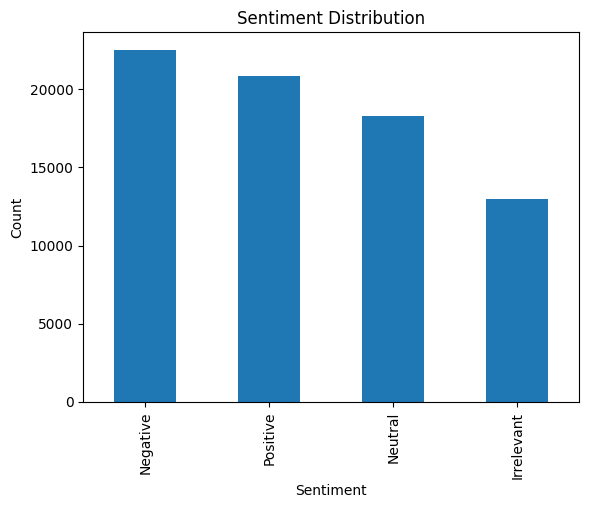

In [13]:

# Sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


## Interpretation of the bar graph

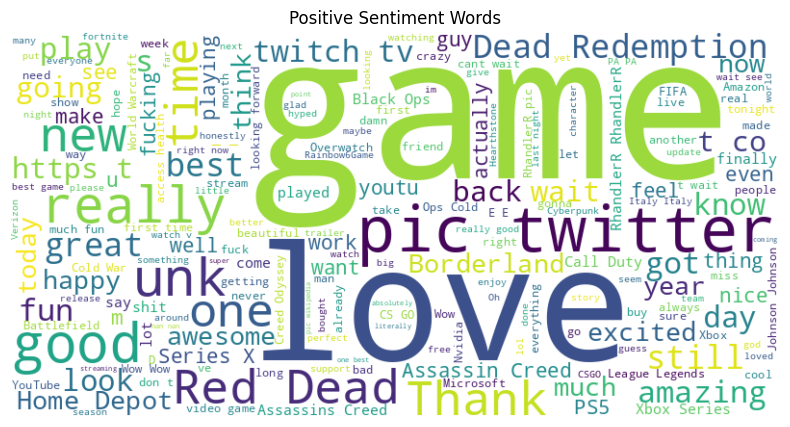

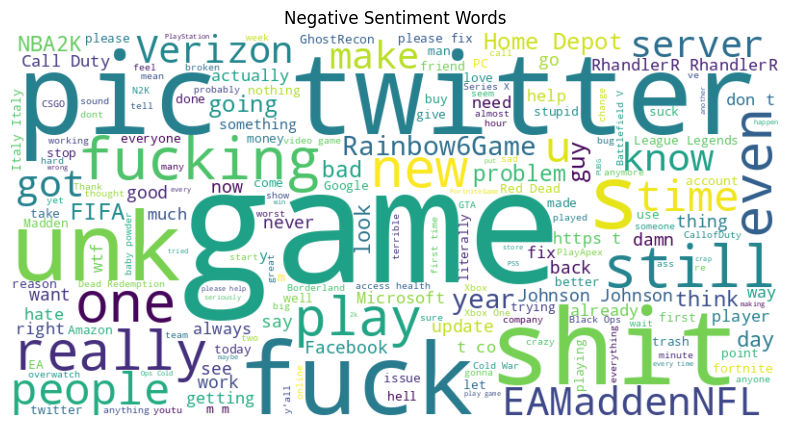

In [14]:
# Function to generate word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Positive sentiment word cloud
plot_wordcloud(data[data['sentiment'] == 'Positive']['text'], 'Positive Sentiment Words')

# Negative sentiment word cloud (if present in your data)
plot_wordcloud(data[data['sentiment'] == 'Negative']['text'], 'Negative Sentiment Words')


The word cloud you've provided highlights positive sentiment words associated with gaming. Here's a breakdown of how to interpret the output:

### Key Elements of the Word Cloud

1. **Prominent Words**: 
   - **"Game," "Love," "Good," "Red," "Dead"**: These words are larger than others, indicating they are mentioned frequently in positive contexts within the dataset. For example:
     - **"Game"** suggests a general love for gaming experiences.
     - **"Love"** reflects strong positive feelings toward specific games or the gaming community.
     - **"Good"** signifies positive reviews or sentiments about gameplay, graphics, storylines, etc.
     - **"Red Dead"** likely refers to "Red Dead Redemption," indicating that it evokes strong positive feelings among players.

2. **Contextual Clusters**:
   - Words related to specific games (e.g., **"Assassins Creed," "Call of Duty," "Overwatch"**) indicate which titles are particularly well-received.
   - Phrases like **"can't wait," "looking forward," and "really excited"** reflect anticipation and eagerness about upcoming releases or expansions.

3. **Emotional Expressions**:
   - Words such as **"amazing," "thank," "happy," and "fun"** indicate positive emotional responses to gaming experiences.
   - Expressions like **"first time," "finally," and "best"** suggest moments of joy or satisfaction related to gaming milestones.

### General Sentiment
The overall sentiment of the data represented in the word cloud is very positive, suggesting that gamers have strong affection and excitement for the gaming industry and specific games. The frequent use of emotionally charged words implies a passionate community that shares experiences and expectations about games.

### Conclusion
This word cloud provides a quick visual insight into the key themes and feelings expressed by gamers. It can be useful for understanding the aspects of gaming that resonate most positively with players, which can inform game developers, marketers, and other stakeholders about consumer sentiments. 

The second word cloud highlights negative sentiment words related to gaming. Here's an interpretation of this output:

### Key Elements of the Word Cloud

1. **Prominent Words**:
   - **"Fuck," "Shit," "Game," "I'm"**: These words are larger and indicate strong negative feelings.
     - **"Fuck" and "Shit"** reflect frustration and anger, common expressions in negative sentiment.
     - **"Game"** suggests dissatisfaction with gaming experiences in general.
     - **"I'm" could imply personal grievances or frustrations expressed by players.

2. **Contextual Clusters**:
   - Words related to specific issues (e.g., **"problem," "bug," "broken," "server," "update"**) indicate common frustrations among players, such as:
     - Technical issues and game bugs.
     - Server problems that affect gameplay, leading to a poor experience.
   - Phrases like **"can't," "really," "even," and "don't"** highlight player frustrations and their dissatisfaction with game mechanics or company actions.

3. **Emotional Expressions**:
   - Words such as **"stupid," "terrible," "bad," and "trash"** reveal a high level of discontent regarding certain games, features, or gaming companies.
   - The presence of expressions like **"everyone," "people," and "one"** suggests a collective sentiment, possibly pointing to widespread dissatisfaction within the gaming community.

### General Sentiment
The overall sentiment represented in this word cloud is predominantly negative, suggesting that players are vocal about their frustrations with gaming experiences. The frequent use of profanity indicates a high level of emotional response to perceived failures or disappointments in games or the gaming industry.

### Conclusion
This word cloud visually represents the themes and feelings associated with negative sentiments in gaming. It serves as a useful tool for game developers, marketers, and stakeholders to understand areas needing improvement or attention. Recognizing common complaints can help in addressing player concerns and improving overall satisfaction.


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(data['text'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


   2020      all  also  amazon  and  back  bad  ban  battlefield   be  ...  \
0   0.0  0.00000   0.0     0.0  0.0   0.0  0.0  0.0          0.0  0.0  ...   
1   0.0  1.00000   0.0     0.0  0.0   0.0  0.0  0.0          0.0  0.0  ...   
2   0.0  0.69757   0.0     0.0  0.0   0.0  0.0  0.0          0.0  0.0  ...   
3   0.0  0.69757   0.0     0.0  0.0   0.0  0.0  0.0          0.0  0.0  ...   
4   0.0  0.69757   0.0     0.0  0.0   0.0  0.0  0.0          0.0  0.0  ...   

   video  wait  want   we  what  world  would  xbox  year  you  
0    0.0   0.0   0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0  
1    0.0   0.0   0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0  
2    0.0   0.0   0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0  
3    0.0   0.0   0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0  
4    0.0   0.0   0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0  

[5 rows x 100 columns]


6. Entity-Wise Sentiment Analysis


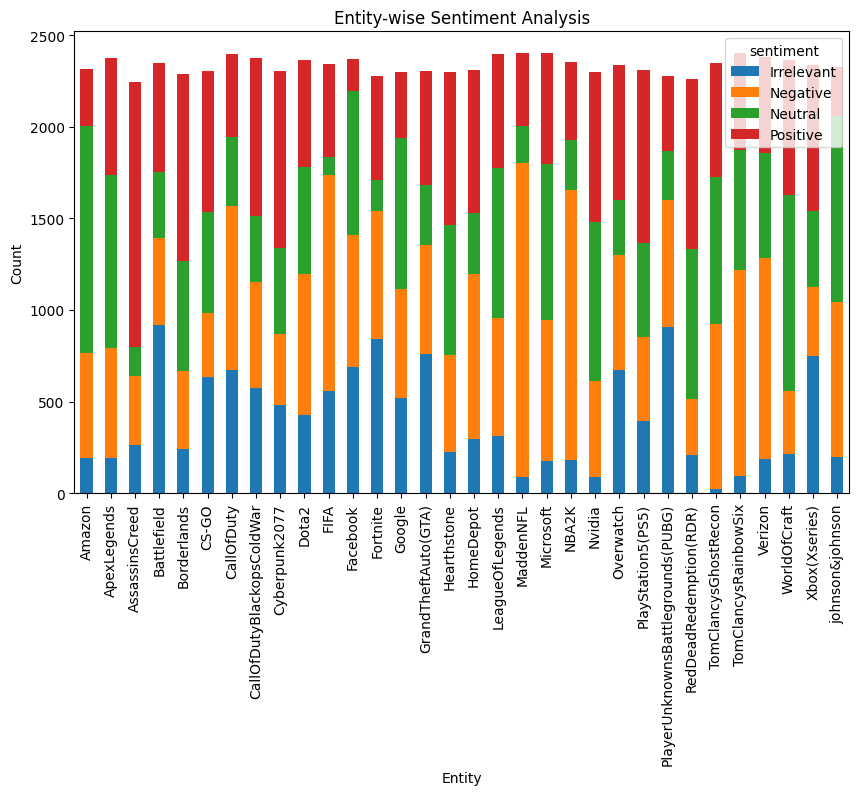

In [16]:
# Group by 'entity' and 'sentiment'
entity_sentiment = data.groupby(['entity', 'sentiment']).size().unstack().fillna(0)
entity_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Entity-wise Sentiment Analysis')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()

